In [78]:
# import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# read the data
df = pd.read_csv('tweets.csv')

In [4]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [5]:
# the information of the data and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [6]:
# check for null values

df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
# delete unwanted columns

del df['id']

In [8]:
# use the label to check unbalanced dataset

df.label.value_counts()

label
0    5894
1    2026
Name: count, dtype: int64

## Data Cleaning

In [9]:
import re

In [14]:
df['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [15]:
# this regex code replaces "'s" with "is"
re.sub(r"'s\b", " is", df['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [21]:
# this regex code replaces any word that begins with "@" with any empty space

re.sub("@[A-Za-z0-9]+", "", df['tweet'][67])

'Shine bright like Wine  #amazing #beautiful #copenhagen #creative #composer #denmark #fun #f4f #hot #iconic #keepthefaith #l4l #mariajensen #music #original #pop #producer #red #rock #soul #singer #songwriter #song #universal #sony #warnerpic.twitter.com/GbeuSyEd5m'

In [27]:
# this regex code replaces the hyperlink(http) with any empty space

re.sub(r"http\S+", "", df['tweet'][24])

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … "

In [30]:
# this regex code replaces the special character with any empty space

re.sub(r"[^a-zA-Z]", " ", df['tweet'][67])

'Shine bright like Wine  amaliexmaria  amazing  beautiful  copenhagen  creative  composer  denmark  fun  f f  hot  iconic  keepthefaith  l l  mariajensen  music  original  pop  producer  red  rock  soul  singer  songwriter  song  universal  sony  warnerpic twitter com GbeuSyEd m'

### Stopwords

In [33]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [34]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)
print(len(nltk_stopwords))

{'some', 'below', "mustn't", 'can', "you're", 'hasn', "hasn't", "wasn't", 'then', "weren't", 'under', "didn't", 'didn', 'yourselves', "needn't", 'themselves', 'which', 'himself', 'until', "you'd", 'more', 'them', 'up', 'here', 'through', 'wasn', 'it', 'm', 'did', 'own', 'y', 'yours', 'he', 'again', 'couldn', 'at', 'was', 'in', 'very', 'd', 'all', 'while', 'not', "couldn't", 'mightn', 'doing', "it's", 'you', 'his', 'myself', "that'll", 'hers', 'or', 'wouldn', "won't", 'do', 'shan', 'haven', "wouldn't", 'they', 'about', 'than', 'from', 'me', 'having', 'before', 'to', 'am', 'him', 'theirs', 'doesn', "shouldn't", 'between', 'ours', 'that', 'does', "hadn't", 'so', 'my', 'these', 'other', 'because', 'too', 'we', 'nor', "doesn't", 'hadn', 'its', 'out', 'been', 'an', 'same', 'isn', 'has', 'if', 'each', 'who', 'off', 'don', 'have', 'by', 'why', "haven't", 'be', 'any', 've', 'mustn', 'shouldn', 'itself', 'your', 'their', 'during', "don't", "isn't", 'but', 'will', 'when', 'a', 'should', 'and', 'w

In [35]:
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)
print(len(sklearn_stopwords))

{'below', 'someone', 'can', 'get', 'nothing', 'seemed', 'then', 'give', 'under', 'per', 'yourselves', 'which', 'put', 'more', 'them', 'thereby', 'via', 'up', 'here', 'through', 'throughout', 'it', 'due', 'own', 'fire', 'yours', 'meanwhile', 'eg', 'at', 'even', 'was', 'another', 'indeed', 'hereafter', 'something', 'ltd', 'not', 'while', 'whither', 'you', 'de', 'myself', 'latterly', 'hers', 'together', 'around', 'towards', 'do', 'others', 'hundred', 'eleven', 'anywhere', 'me', 'less', 'made', 'before', 'him', 'ten', 'see', 'detail', 'full', 'so', 'my', 'these', 'other', 'within', 'we', 'top', 'nor', 'its', 'out', 'an', 'same', 'anyhow', 'please', 'hereupon', 'has', 'each', 'thus', 'who', 'off', 'by', 'thick', 'though', 'why', 'everything', 'along', 'cry', 'wherever', 'their', 'un', 'etc', 'during', 'neither', 'your', 'whole', 'thence', 'four', 'afterwards', 'sometimes', 'will', 'among', 'when', 'often', 'becoming', 'could', 'herein', 'first', 'most', 'seem', 'every', 'almost', 'whence', 

In [37]:
# find the common stopwords in nltk and sklearn stopwords
len(sklearn_stopwords.intersection(nltk_stopwords))

119

In [51]:
# Join the nltk and sklearn stopwords
combined_stopwords = sklearn_stopwords.union(nltk_stopwords)

### Normalization (Stemming and Lemmatization)

In [41]:
from nltk.stem import WordNetLemmatizer
import contractions


In [42]:
lemma = WordNetLemmatizer()

In [47]:
contractions.fix(df['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [57]:
def tweet_cleaned_no_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text =re.sub(r"http\S+", "", new_text)
    new_text =re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text +lemma.lemmatize(token) + ' '

    return cleaned_text

In [60]:
# Apply the function to the tweet and append it to the dataframe
cleaned_tweet = df['tweet'].apply(tweet_cleaned_no_stopwords)
# cleaned_tweet = []
# for token in df['tweet']:
#     cleaned_tweet.append(tweet_cleaned_no_stopwords(token))

In [62]:
df['cleaned_tweet_w/o_stopwords'] = cleaned_tweet

### Visualisation

In [70]:
all_words = []
for word in cleaned_tweet:
    all_words.extend(word.split())
print(all_words[:10])
print(len(all_words))

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly']
129294


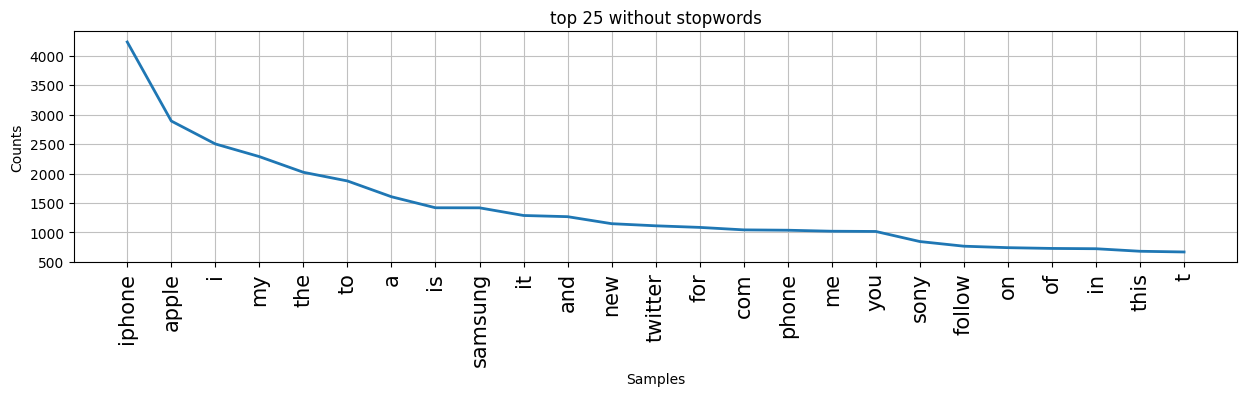

In [84]:
# plot for top 25 words without stopwords
# frequency distribution

freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(15,3))

plt.title('top 25 without stopwords')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()



In [87]:
# function to clean the data with stopwords
def tweet_cleaned_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text =re.sub(r"http\S+", "", new_text)
    new_text =re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text =[word for word in new_text.split() if word not in combined_stopwords ]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text +lemma.lemmatize(token) + ' '

    return cleaned_text

In [88]:
# apply the function and append to the dataframe
cleaned_tweet_w_stopwords = df['tweet'].apply(tweet_cleaned_stopwords)
df['cleaned_with_stopwords'] = cleaned_tweet_w_stopwords

In [91]:
all_words = []
for word in df['cleaned_with_stopwords']:
    all_words.extend(word.split())
print(all_words[:5])
print(len(all_words))

['fingerprint', 'pregnancy', 'test', 'android', 'apps']
89390


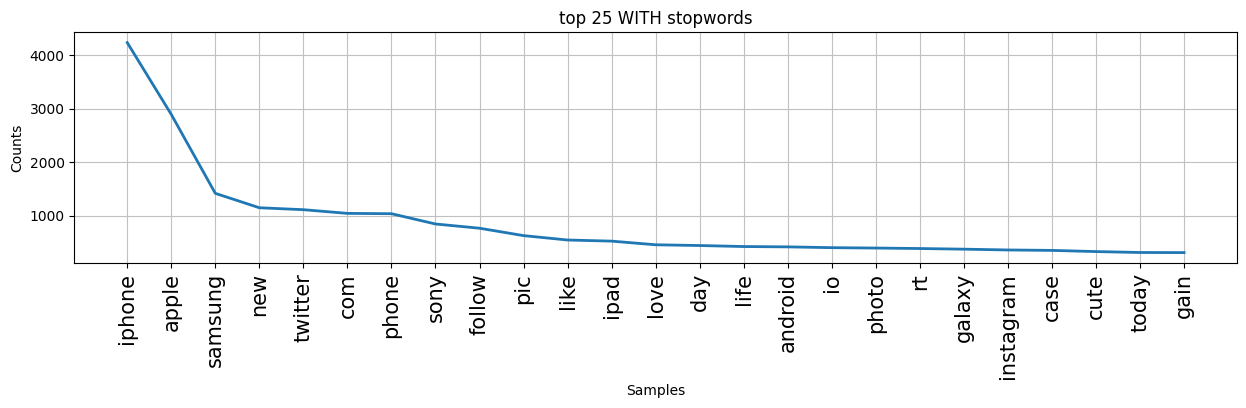

In [94]:
# plot for top 25 words with stopwords
# frequency distribution

freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(15,3))

plt.title('top 25 WITH stopwords')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()



#### Update the stopwords with domain specific stopwords

In [96]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'io', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [109]:
# this function applies an updated domain specific stopwords
def tweet_cleaned_domain_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text =re.sub(r"http\S+", "", new_text)
    new_text =re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text =[word for word in new_text.split() if word not in final_stopwords ]
    new_text =[word for word in new_text if len(word) > 2 ] #get words with more than 2 alphabets

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text +lemma.lemmatize(token) + ' '

    return cleaned_text

In [110]:
cleaned_tweet_w_domain_stopwords = df['cleaned_with_stopwords'].apply(tweet_cleaned_domain_stopwords)
df['cleaned_tweet_w_domain_stopwords'] = cleaned_tweet_w_domain_stopwords


In [111]:
domain_clean = []
for word in cleaned_tweet_w_domain_stopwords:
    domain_clean.extend(word.split())

print(len(domain_clean))
print(domain_clean[:5])

80654
['fingerprint', 'pregnancy', 'test', 'android', 'apps']


In [117]:
del df['tweet']

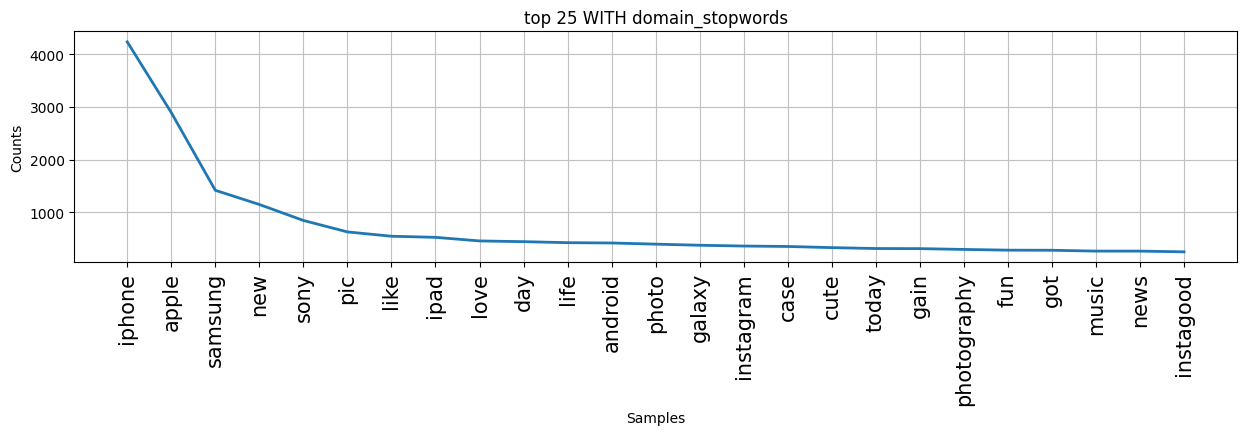

In [112]:
freq_dist = nltk.FreqDist(domain_clean)

plt.figure(figsize=(15,3))

plt.title('top 25 WITH domain_stopwords')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)
plt.show()

Feature Extraction

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
CV = CountVectorizer()
# sparse matrix is a matrix with majority of Zeros (csr=> compressed sparse matrix)
CV_features = CV.fit_transform(df['cleaned_tweet_w/o_stopwords'])
type(CV_features)

scipy.sparse._csr.csr_matrix

In [125]:
# convert the sparse matrix to dense format to see the Zeros and save to a dataframe

data = pd.DataFrame(CV_features.todense())

In [154]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15962,15963,15964,15965,15966,15967,15968,15969,15970,15971
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# check data size
data.size/1e6

126.49824

In [132]:
# count the number of non-zeros
np.count_nonzero(data)

114102

In [135]:
# percent of non zeros to zeros is less < 0.1
np.count_nonzero(data) / data.size * 100

0.09020046444914966

In [129]:
CV.get_feature_names_out()[:50]

array(['aa', 'aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl',
       'aarhus', 'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal',
       'aaydojbfkq', 'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb',
       'abc', 'abdou', 'abe', 'aber', 'abercrombie', 'abi', 'ability',
       'abit', 'able', 'ableton', 'abnqum', 'aboard', 'about',
       'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight',
       'above', 'abp', 'abscbn', 'absence', 'absolute', 'absolutely',
       'absurd', 'abt', 'abu', 'abudhabi', 'abuja', 'abujacity',
       'abujafct', 'abujapeople'], dtype=object)

In [166]:
CV_features[2].todense()

[matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)]

In [150]:
# transform the dense numbers back to words, use the inverse transform
CV.inverse_transform(np.asarray(CV_features[2].todense()))

[array(['connect', 'go', 'iphone', 'love', 'makememories', 'relax',
        'smartphone', 'talk', 'this', 'unplug', 'we', 'wifi', 'would',
        'you'], dtype='<U41')]

### Model Building

In [171]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(CV_features, df['label'], test_size=0.25, stratify=df['label'])

In [174]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

"""overfiiting in the model. The train data have a wide variance against test data
logistic regression is a high bias and low variance model. i.e it makes a lot of assumption which makes the model consistence
""" 
# Why is this model not consistent? Most likely because of the excessive features

0.9782828282828283
0.8929292929292929


#### Regularization
This is a technique used to prevent overfitting, it involves adding a penalty term to the loss function, the penalty term discourages the model  from fitting the training data too closely and encourages it to generalize better to new data.
##### 2 types of regularization
1. L1 = Lasso => Used for building feature selection
2. L2 = Ridge => Used for multicolinearity in dataset

Multicolinearity occurs when there is a relationship between two or more independent variables, or when one independent variable can be predicted from the others.It can also occur when there are too many variables relative to size

 


In [181]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.1)
LR1.fit(X_train, y_train)
print(LR1.score(X_train, y_train))
print(LR1.score(X_test, y_test))

0.8648148148148148
0.8656565656565657


#### Cross Validation

In [183]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold


In [185]:
X = CV_features
y = df['label']

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1,X,y,cv=kfold, scoring='accuracy')

print(results)
print(np.round((results.mean()) *100, 2), np.round((results.std())*100, 2))
# accuracy = mean +/- std%

[0.85606061 0.8459596  0.85416667 0.87121212 0.86679293]
85.88 0.91


In [187]:
results = cross_validate(LR1,X,y,cv=kfold, scoring='accuracy', return_train_score=True)
results

{'fit_time': array([0.10170484, 0.08282876, 0.09635735, 0.15450215, 0.13863277]),
 'score_time': array([0.00669575, 0.00199389, 0.00116873, 0.        , 0.01340914]),
 'test_score': array([0.85606061, 0.8459596 , 0.85416667, 0.87121212, 0.86679293]),
 'train_score': array([0.86679293, 0.87010732, 0.86789773, 0.86695076, 0.86631944])}

In [191]:
print(results['train_score'].mean())
print(results['test_score'].mean())

0.8676136363636365
0.8588383838383837



#### HyperParameter Tuning

In [192]:
from sklearn.model_selection import GridSearchCV

In [204]:
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')
c_values = np.arange(0.00001, 1, 0.05)
grid = GridSearchCV(estimator=LR1, param_grid={'C': c_values}, cv=kfold, \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [197]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, verbose=2)

In [206]:
# print the grid_search results
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.80001}, 0.8885101010101009, 16)

In [209]:
list(grid_results.cv_results_.keys())

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_C',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

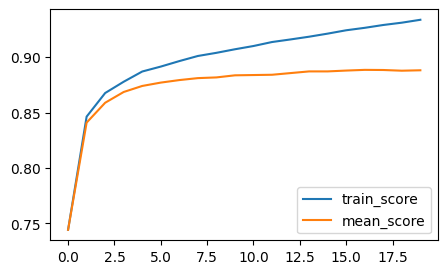

In [220]:
plt.figure(figsize=(5, 3))
plt.plot(grid_results.cv_results_['mean_train_score'], label='train_score' )
plt.plot(grid_results.cv_results_['mean_test_score'], label='mean_score')

plt.legend()
plt.show()

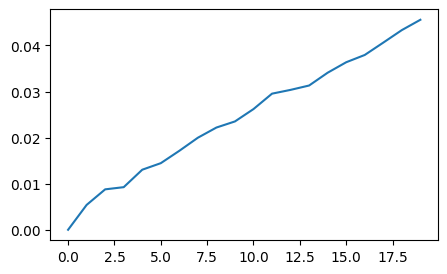

In [241]:
plt.figure(figsize=(5, 3))

plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

plt.show()

In [237]:
# standard deviation score X best score
grid_results.cv_results_['std_test_score']*[grid_results.best_score_]*100

array([0.02243712, 0.94728782, 0.80633292, 0.73940451, 0.80789225,
       0.8322933 , 0.79120692, 0.84594205, 0.75139244, 0.70739238,
       0.74837142, 0.71798796, 0.67255255, 0.76861478, 0.73342287,
       0.72322754, 0.79691282, 0.78240924, 0.83455846, 0.76615468])

In [225]:
grid_results.best_score_

0.8885101010101009

#### Pipeline

In [238]:
from sklearn.pipeline import make_pipeline, Pipeline

In [258]:
#  Create a pipeline for cleaned data without stopwords

X=df['cleaned_tweet_w/o_stopwords']
y=df['label']

cv=CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C=0.1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

CV_pipe= Pipeline([('CV', cv), ('LR', LR1)])
results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')

print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100,2))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~
CV_pipe.fit(X,y)
print(f"length of vocabulary: {len(CV_pipe['CV'].vocabulary_)}")

[0.85606061 0.8459596  0.85416667 0.87121212 0.86679293]
85.88 0.91
length of vocabulary, 15972


In [254]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [255]:
len(CV_pipe['CV'].vocabulary_)

15972

In [259]:
#  Create a pipeline for cleaned data with stopwords

X=df['cleaned_tweet_w/o_stopwords']
y=df['label']

cv=CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C=0.1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

CV_pipe= Pipeline([('CV', cv), ('LR', LR1)])
results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')

print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100,2))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~
CV_pipe.fit(X,y)
print(f"length of vocabulary: {len(CV_pipe['CV'].vocabulary_)}")

[0.85669192 0.82575758 0.82260101 0.84027778 0.83396465]
83.59 1.21
length of vocabulary: 15677


In [260]:
CV_pipe.named_steps

{'CV': CountVectorizer(stop_words=['phone', 'mobile', 'twitter', 'rt', 'io', 'com',
                             'follow', 'below', 'someone', "mustn't", 'can',
                             'get', 'nothing', "you're", 'hasn', 'seemed',
                             'then', "hasn't", 'give', "wasn't", 'under', 'per',
                             "weren't", "didn't", 'yourselves', 'which', 'put',
                             'more', 'them', 'thereby', ...]),
 'LR': LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [261]:
#  Create a pipeline for cleaned data with stopwords, minimum_df

X=df['cleaned_tweet_w/o_stopwords']
y=df['label']

cv=CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C=0.1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

CV_pipe= Pipeline([('CV', cv), ('LR', LR1)])
results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')

print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100,2))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~
CV_pipe.fit(X,y)
print(f"length of vocabulary: {len(CV_pipe['CV'].vocabulary_)}")

[0.85669192 0.82575758 0.82260101 0.84027778 0.83459596]
83.6 1.21
length of vocabulary: 1096


In [262]:
#  Create a pipeline for cleaned data with stopwords, minimum_df, max_features

X=df['cleaned_tweet_w/o_stopwords']
y=df['label']

cv=CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=1000)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1',C=0.1)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

CV_pipe= Pipeline([('CV', cv), ('LR', LR1)])
results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')

print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100,2))

# ~~~~~~~~~~~~~~~~~~~~~~~~~~
CV_pipe.fit(X,y)
print(f"length of vocabulary: {len(CV_pipe['CV'].vocabulary_)}")

[0.85669192 0.82575758 0.82260101 0.84027778 0.83459596]
83.6 1.21
length of vocabulary: 1000
